In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df=pd.read_csv('C:\\Users\\ARWINDD\\OneDrive\\Desktop\\Statistics\\train.csv')

In [ ]:
data=pd.read_csv("C:\\Users\\ARWINDD\\OneDrive\\Desktop\\Statistics\\train.csv")


In [ ]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
data.likes.unique

<bound method Series.unique of 0        8523
1          56
2          25
3         777
4           1
         ... 
14994    1137
14995    3849
14996      16
14997       0
14998      22
Name: likes, Length: 14999, dtype: object>

In [ ]:
data.duration.value_counts()

duration
PT31S         147
PT21S          82
PT4M1S         51
PT10M40S       47
PT4M           46
             ... 
PT58M6S         1
PT38M38S        1
PT1H35M39S      1
PT1H43M30S      1
PT29M38S        1
Name: count, Length: 3146, dtype: int64

In [ ]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
df.shape

(14999, 9)

In [ ]:
# Asign each category a number for category feature
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
df['category']=df['category'].map(category)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.0+ MB


In [ ]:
# Removing character 'F' present in data
df=df[df.views!='F']
df=df[df.likes!='F']
df=df[df.dislikes!='F']
df=df[df.comment!='F']

In [ ]:
# Converting Object type to Integer
df['views']=pd.to_numeric(df['views'])
df['comment']=pd.to_numeric(df['comment'])
df['likes']=pd.to_numeric(df['likes'])
df['dislikes']=pd.to_numeric(df['dislikes'])
df['adview']=pd.to_numeric(df['adview'])



In [ ]:
column_vidid=df.vidid

In [ ]:
# Encoding Features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
duration=LabelEncoder()
vidid=LabelEncoder()
published=LabelEncoder()
df['duration']=duration.fit_transform(df.duration)
df['vidid']=vidid.fit_transform(df['vidid'])
df['published']=published.fit_transform(df['published'])
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [ ]:
import datetime
import time

In [ ]:
def check(x):
    y=x[2:]
    h=''
    m=''
    s=''
    mm=''
    P=['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=='H'):
                h=mm
                mm=''
            elif(i=='M'):
                m=mm
                mm=''
            else:
                s=mm
                mm=''
    if(h==''):
        h='00'
    if(m==''):
        m='00'
    if(s==''):
        s='00'
    bp=h+':'+m+':'+s
    return bp

In [ ]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
duration=data['duration']
time=duration.apply(check)

In [ ]:
time.head()

0     00:7:37
1     00:9:30
2     00:2:16
3     00:4:22
4    00:00:31
Name: duration, dtype: object

In [ ]:
def fun_sec(time_string):
    h,m,s=time_string.split(':')
    return int(h)*3600+int(m)*60+int(s)

In [ ]:
time1=time.apply(fun_sec)

In [ ]:
time1.head()

0    457
1    570
2    136
3    262
4     31
Name: duration, dtype: int64

In [ ]:
df['duration']=time1

In [ ]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


## Visualization


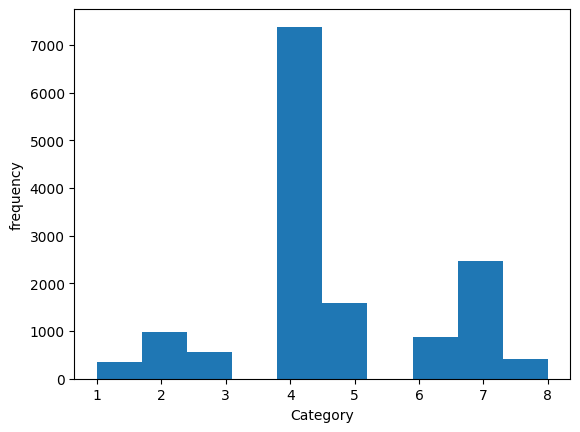

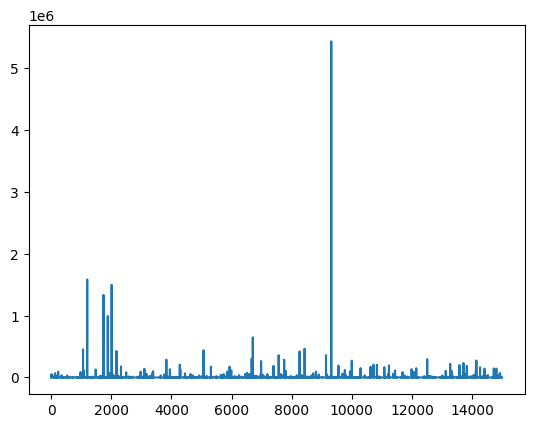

In [ ]:
# Individual Plots
plt.hist(df['category'])
plt.xlabel('Category')
plt.ylabel('frequency')
plt.show()
plt.plot(df['adview'])
plt.show()

In [ ]:
# Removing videos with adview greater than 2 million adview

In [ ]:
df=df[df['adview']<2000000]

In [ ]:
# Heatmap
import seaborn as sns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14636 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   vidid      14636 non-null  int32
 1   adview     14636 non-null  int64
 2   views      14636 non-null  int64
 3   likes      14636 non-null  int64
 4   dislikes   14636 non-null  int64
 5   comment    14636 non-null  int64
 6   published  14636 non-null  int32
 7   duration   14636 non-null  int64
 8   category   14636 non-null  int64
dtypes: int32(2), int64(7)
memory usage: 1.0 MB


In [ ]:
df.isnull().sum()

vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

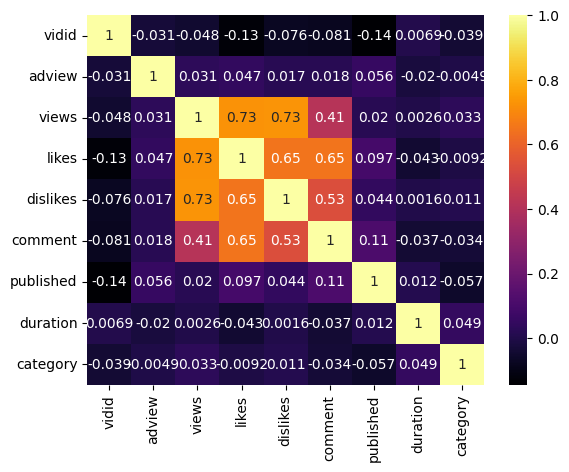

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='inferno')
plt.show()

In [ ]:
final=df.drop(['vidid'],axis=1)

In [ ]:
final.head()

,adview,views,likes,dislikes,comment,published,duration,category
0,40,1031602,8523,363,1095,2168,457,6
1,2,1707,56,2,6,2185,570,4
2,1,2023,25,0,2,2094,136,3
3,6,620860,777,161,153,2119,262,8
4,1,666,1,0,0,2091,31,4


In [ ]:
y=final['adview']
x=final.drop(['adview'],axis=1)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14636 entries, 0 to 14998
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   views      14636 non-null  int64
 1   likes      14636 non-null  int64
 2   dislikes   14636 non-null  int64
 3   comment    14636 non-null  int64
 4   published  14636 non-null  int32
 5   duration   14636 non-null  int64
 6   category   14636 non-null  int64
dtypes: int32(1), int64(6)
memory usage: 1.3 MB


In [ ]:
y.head()

0    40
1     2
2     1
3     6
4     1
Name: adview, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((11708, 7), (11708,), (2928, 7), (2928,))

In [ ]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
x_train.mean()

0.1739096800320488

In [ ]:
# Evaluation Metrics
from sklearn import metrics
def print_error(x_test,y_test,model):
    prediction=model.predict(x_test)
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,prediction))
    print("Mean Squared Error:", metrics.mean_squared_error(y_test,prediction))
    print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,prediction)))


In [ ]:
# LinearRegression
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(x_train,y_train)
print_error(x_test,y_test,model)

Mean Absolute Error: 3707.3780058245306
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [ ]:
# DecisionTree
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
print_error(x_test,y_test,model)

Mean Absolute Error: 2588.7629781420765
Mean Squared Error: 883905957.0744536
Root Mean Squared Error: 29730.555949636288


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators=200
max_depth=25
min_samples_split=15
min_samples_leaf=2
model=RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
model.fit(x_train,y_train)
print_error(x_test,y_test,model)

Mean Absolute Error: 3269.804029541004
Mean Squared Error: 721262160.3797204
Root Mean Squared Error: 26856.324401893133


In [ ]:
# Support Vector Regression
from sklearn.svm import SVR
model=SVR()
model.fit(x_train,y_train)
print_error(x_test,y_test,model)

Mean Absolute Error: 1696.9438599505638
Mean Squared Error: 833685776.029172
Root Mean Squared Error: 28873.617300732723


In [ ]:
# Artificial Neural Networks
import keras
from keras.layers import Dense

In [ ]:
ann=keras.models.Sequential([
    Dense(6,activation='relu',
    input_shape=x_train.shape[1:]),
    Dense(6,activation='relu'),
    Dense(1)

])

In [ ]:
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,
            loss=loss,
            metrics=['mean_squared_error'])
history=ann.fit(x_train,y_train,epochs=100)

Epoch 1/100
366/366 [==============================] - 1s 2ms/step - loss: 767406912.0000 - mean_squared_error: 767406912.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767400448.0000 - mean_squared_error: 767400448.0000
Epoch 3/100
366/366 [==============================] - 1s 3ms/step - loss: 767380992.0000 - mean_squared_error: 767380992.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767350016.0000 - mean_squared_error: 767350016.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767304704.0000 - mean_squared_error: 767304704.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767247936.0000 - mean_squared_error: 767247936.0000
Epoch 7/100
366/366 [==============================] - 1s 3ms/step - loss: 767176000.0000 - mean_squared_error: 767176000.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767090368.0000 - mean_squared_error:

In [ ]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 48        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print_error(x_test,y_test,ann)

92/92 [==============================] - 0s 1ms/step
Mean Absolute Error: 3276.236276078094
Mean Squared Error: 829862963.9018128
Root Mean Squared Error: 28807.342187397517


In [ ]:
# Saving Keras ANN model
ann.save("ann_youtubeadview.h5")

C:\Users\ARWINDD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
ann.save("ann_youtubeadview.keras")